## Predicci√≥n de √âxito en Campa√±as de Crowdfunding
Formas parte del equipo de anal√≠tica en una plataforma de **crowdfunding** donde emprendedores publican campa√±as para recaudar fondos. Tu equipo quiere desarrollar un modelo de Machine Learning para predecir si una campa√±a ser√° exitosa (es decir, si alcanzar√° su objetivo de recaudaci√≥n).

**El objetivo de negocio es priorizar qu√© campa√±as mostrar en el homepage para maximizar la tasa de campa√±as exitosas.** Como s√≥lo pueden destacar 10 campa√±as en la homepage, se plantea que es preferible evitar destacar campa√±as que terminen fracasando, aunque eso signifique eventualmente dejar de mostrar algunas que s√≠ hubieran resultado exitosas.

## ¬øQu√© debes hacer?
1- Realizar un breve an√°lisis exploratorio del dataset (gr√°fico y anal√≠tico) y comentar tus conclusiones al respecto.

2- Realizar la limpieza del dataset que consideres necesaria y crear un pipeline para preprocesar correctamente los datos (valores nulos, outliers, codificaci√≥n, escalado, etc.).

3- Entrenar al menos 3 modelos de clasificaci√≥n optimizando hiperpar√°metros y buscando maximizar la m√©trica que consideres adecuada.

4- Reportar m√©tricas de performance (recall, precisi√≥n, accuracy, AUC y matriz de confusi√≥n) para cada uno de estos modelos y seleccionar el mejor modelo bajo tu criterio.

5- Justificar y comentar todas tus decisiones y el c√≥digo que utilices.




In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Dataset: https://drive.google.com/file/d/1IKYaGCLijRIdTu00Vum21E21jMP__GrU/view?usp=sharing

**Features:**

- goal_amount: Monto total (en USD) que la campa√±a busca recaudar.

- duration_days: Cantidad de d√≠as que durar√° la campa√±a una vez lanzada.

- num_rewards: N√∫mero de recompensas ofrecidas a los patrocinadores (por ejemplo, productos, descuentos, agradecimientos).

- has_video: 1 si la campa√±a incluye un video de presentaci√≥n, 0 si no.

- num_images: Cantidad de im√°genes incluidas en la campa√±a.

- campaign_category: Categor√≠a tem√°tica de la campa√±a.

- launch_day: D√≠a de la semana en que se lanza la campa√±a.

- founder_previous_successes: N√∫mero de campa√±as exitosas previas del fundador en la misma plataforma.

- founder_followers: N√∫mero de seguidores que tiene el fundador en la plataforma.

**Target:**
- success: Toma el valor 1 si la campa√±a alcanz√≥ su meta de recaudaci√≥n, 0 si no.

In [256]:
df_camp = pd.read_csv("/Users/lolonastri/Desktop/IA_UCEMA/parciales/primer_parcial_IA/data/crowdfunding_dataset.csv")
df_camp

goal_amount  duration_days  num_rewards  has_video  num_images  \
0         18795.0             15            1          1         NaN   
1          3860.0             30            4          1         0.0   
2         79820.0             30            2          1         NaN   
3         57886.0             15            2          1         4.0   
4          9265.0             30            4          1         3.0   
...           ...            ...          ...        ...         ...   
6495      80606.0             15            5          0         3.0   
6496       3924.0             60            6          0         1.0   
6497      54322.0             15            2          0         3.0   
6498      29478.0             45            4          1         3.0   
6499      74042.0             30            2          1         2.0   

     campaign_category launch_day  founder_previous_successes  \
0                  art     Friday                           1   
1                games     Friday                           1   
2           technology   Thursday                           1   
3               design   Thursday                           0   
4                music  Wednesday                           1   
...                ...        ...                         ...   
6495           fashion     Friday                           1   
6496           fashion     Sunday                           1   
6497           fashion    Tuesday                           2   
6498             games     Monday                           1   
6499               art     Sunday                           2   

      founder_followers  success  
0                   NaN        1  
1                2112.0        1  
2                 267.0        0  
3                2134.0        0  
4                4252.0        1  
...                 ...      ...  
6495             2702.0        1  
6496             1639.0        1  
6497              860.0        0  
6498             1717.0        0  
6499             9750.0        1  

[6500 rows x 10 columns]

---

## **Parte 1: Comprensi√≥n y Preparaci√≥n de Datos**

### ‚Üí Validaci√≥n de la data

In [257]:
print("El dataset tiene" , df_camp.shape[0], "filas y", df_camp.shape[1], "columnas")

El dataset tiene 6500 filas y 10 columnas


In [258]:
df_camp.columns

Index(['goal_amount', 'duration_days', 'num_rewards', 'has_video',
       'num_images', 'campaign_category', 'launch_day',
       'founder_previous_successes', 'founder_followers', 'success'],
      dtype='object')

In [259]:
from funciones.funciones import validate_columns
validate_columns(df_camp)

Unique_Values Num_Unique_Values  Num_Null_Values  \
goal_amount                          NaN            6156.0              344   
duration_days                        NaN            6500.0                0   
num_rewards                          NaN            6500.0                0   
has_video                            NaN            6500.0                0   
num_images                           NaN            5831.0              669   
campaign_category                      9              6500                0   
launch_day                             7              6500                0   
founder_previous_successes           NaN            6500.0                0   
founder_followers                    NaN            6028.0              472   
success                              NaN            6500.0                0   

                            %_Null_Values  \
goal_amount                      5.292308   
duration_days                    0.000000   
num_rewards                      0.000000   
has_video                        0.000000   
num_images                      10.292308   
campaign_category                0.000000   
launch_day                       0.000000   
founder_previous_successes       0.000000   
founder_followers                7.261538   
success                          0.000000   

                                                     Sample_Unique_Values  
goal_amount                 [20625.0, 62494.0, 65956.0, 70563.0, 99907.0]  
duration_days                                        [45, 60, 30, 60, 15]  
num_rewards                                               [5, 5, 5, 1, 2]  
has_video                                                 [1, 1, 0, 1, 1]  
num_images                                      [4.0, 2.0, 3.0, 1.0, 3.0]  
campaign_category                       [comics, misc, food, misc, music]  
launch_day                     [Monday, Monday, Thursday, Monday, Monday]  
founder_previous_successes                                [0, 1, 2, 0, 3]  
founder_followers                    [434.0, 4351.0, nan, 1647.0, 2972.0]  
success                                                   [0, 1, 0, 0, 1]

In [260]:
df_camp.describe()

goal_amount  duration_days  num_rewards    has_video   num_images  \
count   6156.000000    6500.000000  6500.000000  6500.000000  5831.000000   
mean   51323.209877      32.776154     3.513538     0.643538     2.497513   
std    28270.931442      12.974517     1.871540     0.478991     1.584970   
min     3055.000000      15.000000     0.000000     0.000000     0.000000   
25%    26854.750000      30.000000     2.000000     0.000000     1.000000   
50%    50895.000000      30.000000     3.000000     1.000000     2.000000   
75%    76347.250000      45.000000     5.000000     1.000000     3.000000   
max    99999.000000      60.000000    12.000000     1.000000    10.000000   

       founder_previous_successes  founder_followers      success  
count                 6500.000000        6028.000000  6500.000000  
mean                     1.477846        1794.113968     0.389538  
std                      1.217140        1787.222902     0.487683  
min                      0.000000           0.000000     0.000000  
25%                      1.000000         516.750000     0.000000  
50%                      1.000000        1266.000000     0.000000  
75%                      2.000000        2488.250000     1.000000  
max                      7.000000       16010.000000     1.000000

---

### ‚Üí  Veo los tipos de datos con dtypes

In [261]:
df_camp.dtypes

goal_amount                   float64
duration_days                   int64
num_rewards                     int64
has_video                       int64
num_images                    float64
campaign_category              object
launch_day                     object
founder_previous_successes      int64
founder_followers             float64
success                         int64
dtype: object

In [262]:
df_camp['success'].value_counts().sort_index() 

success
0    3968
1    2532
Name: count, dtype: int64

In [263]:
for col in df_camp.columns:
    print(f"Value counts for {col}:")
    print(df_camp[col].value_counts())
    print("\n")

Value counts for goal_amount:
goal_amount
67925.0    3
49163.0    3
6748.0     3
23884.0    2
94748.0    2
          ..
95059.0    1
38631.0    1
9471.0     1
25612.0    1
74042.0    1
Name: count, Length: 5969, dtype: int64


Value counts for duration_days:
duration_days
30    3311
15    1309
45    1248
60     632
Name: count, dtype: int64


Value counts for num_rewards:
num_rewards
3     1376
4     1280
2     1175
5      858
1      699
6      497
7      244
0      188
8      117
9       44
10      15
11       5
12       2
Name: count, dtype: int64


Value counts for has_video:
has_video
1    4183
0    2317
Name: count, dtype: int64


Value counts for num_images:
num_images
2.0     1481
3.0     1267
1.0     1194
4.0      776
0.0      487
5.0      376
6.0      165
7.0       57
8.0       20
9.0        7
10.0       1
Name: count, dtype: int64


Value counts for campaign_category:
campaign_category
technology    1145
art            928
food           873
games          676
design         

---

### ‚Üí Valores outliers

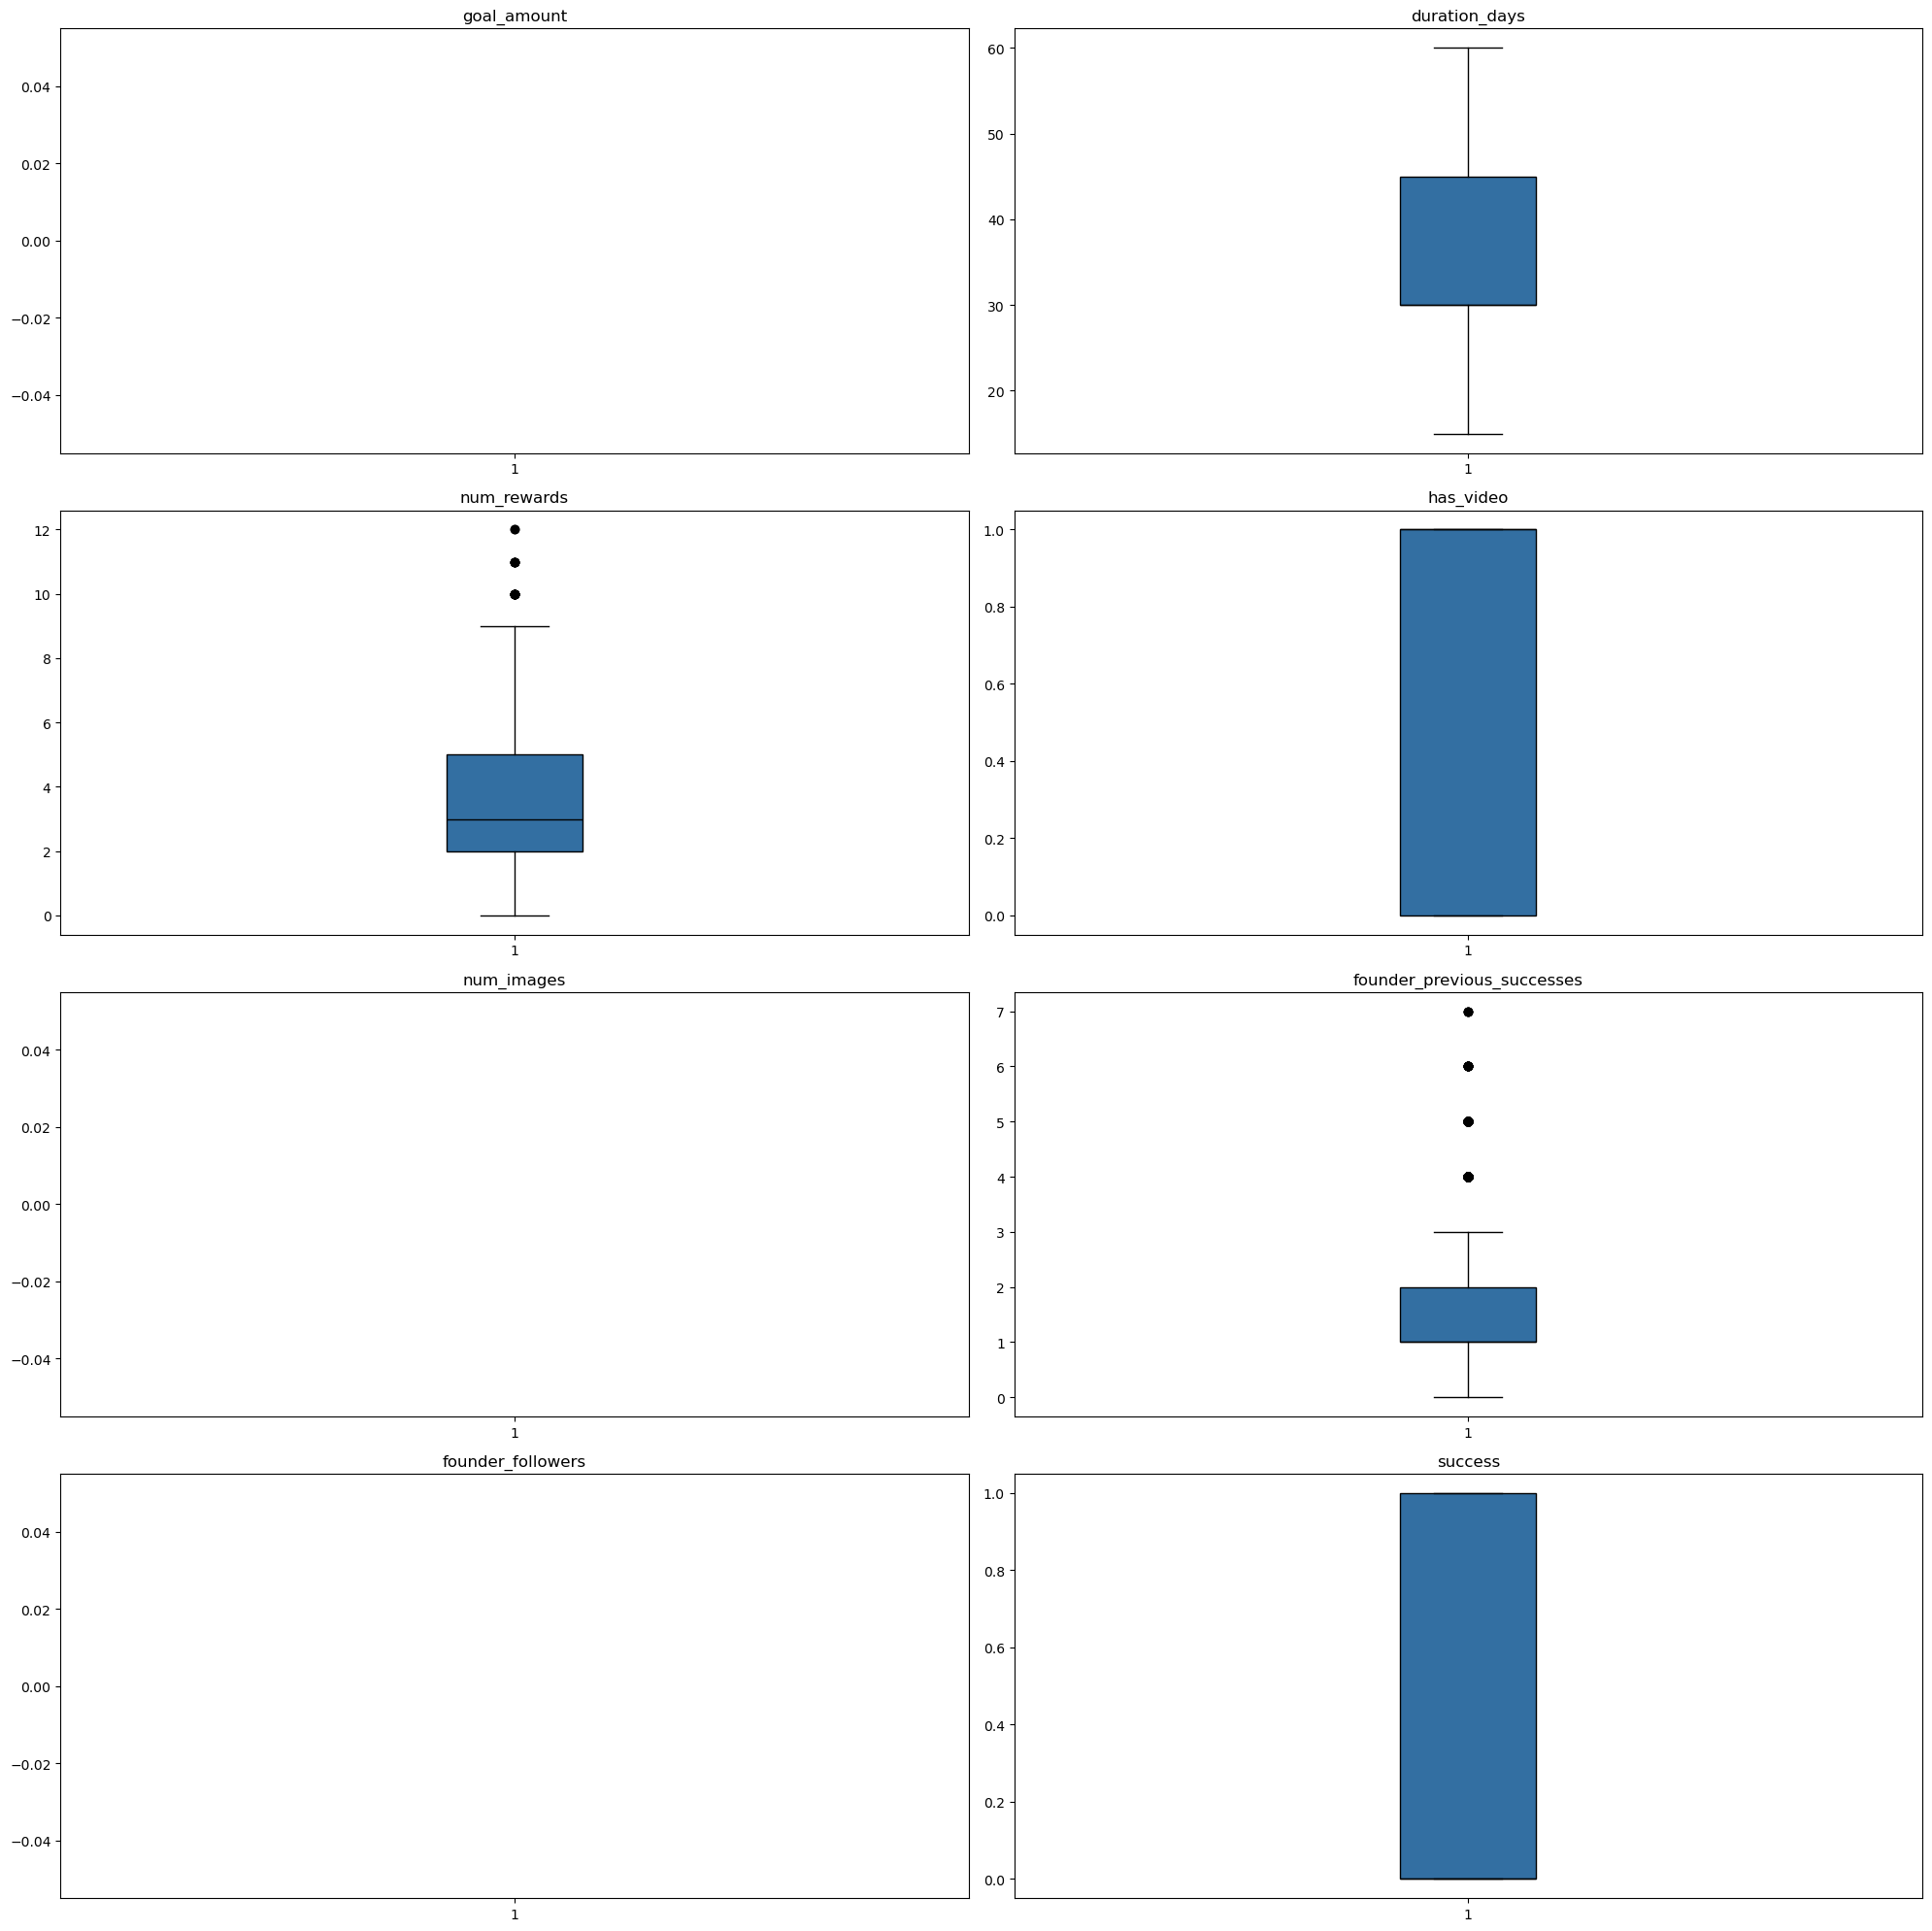

In [264]:
from funciones.funciones import plot_outliers
plot_outliers(df_camp)

#### Para este dataset he tomado la decision de no remover outliers debido a que no veo ninguna inconsistencia en los datos.

---

## **Parte 2: An√°lisis Exploratorio de Datos**


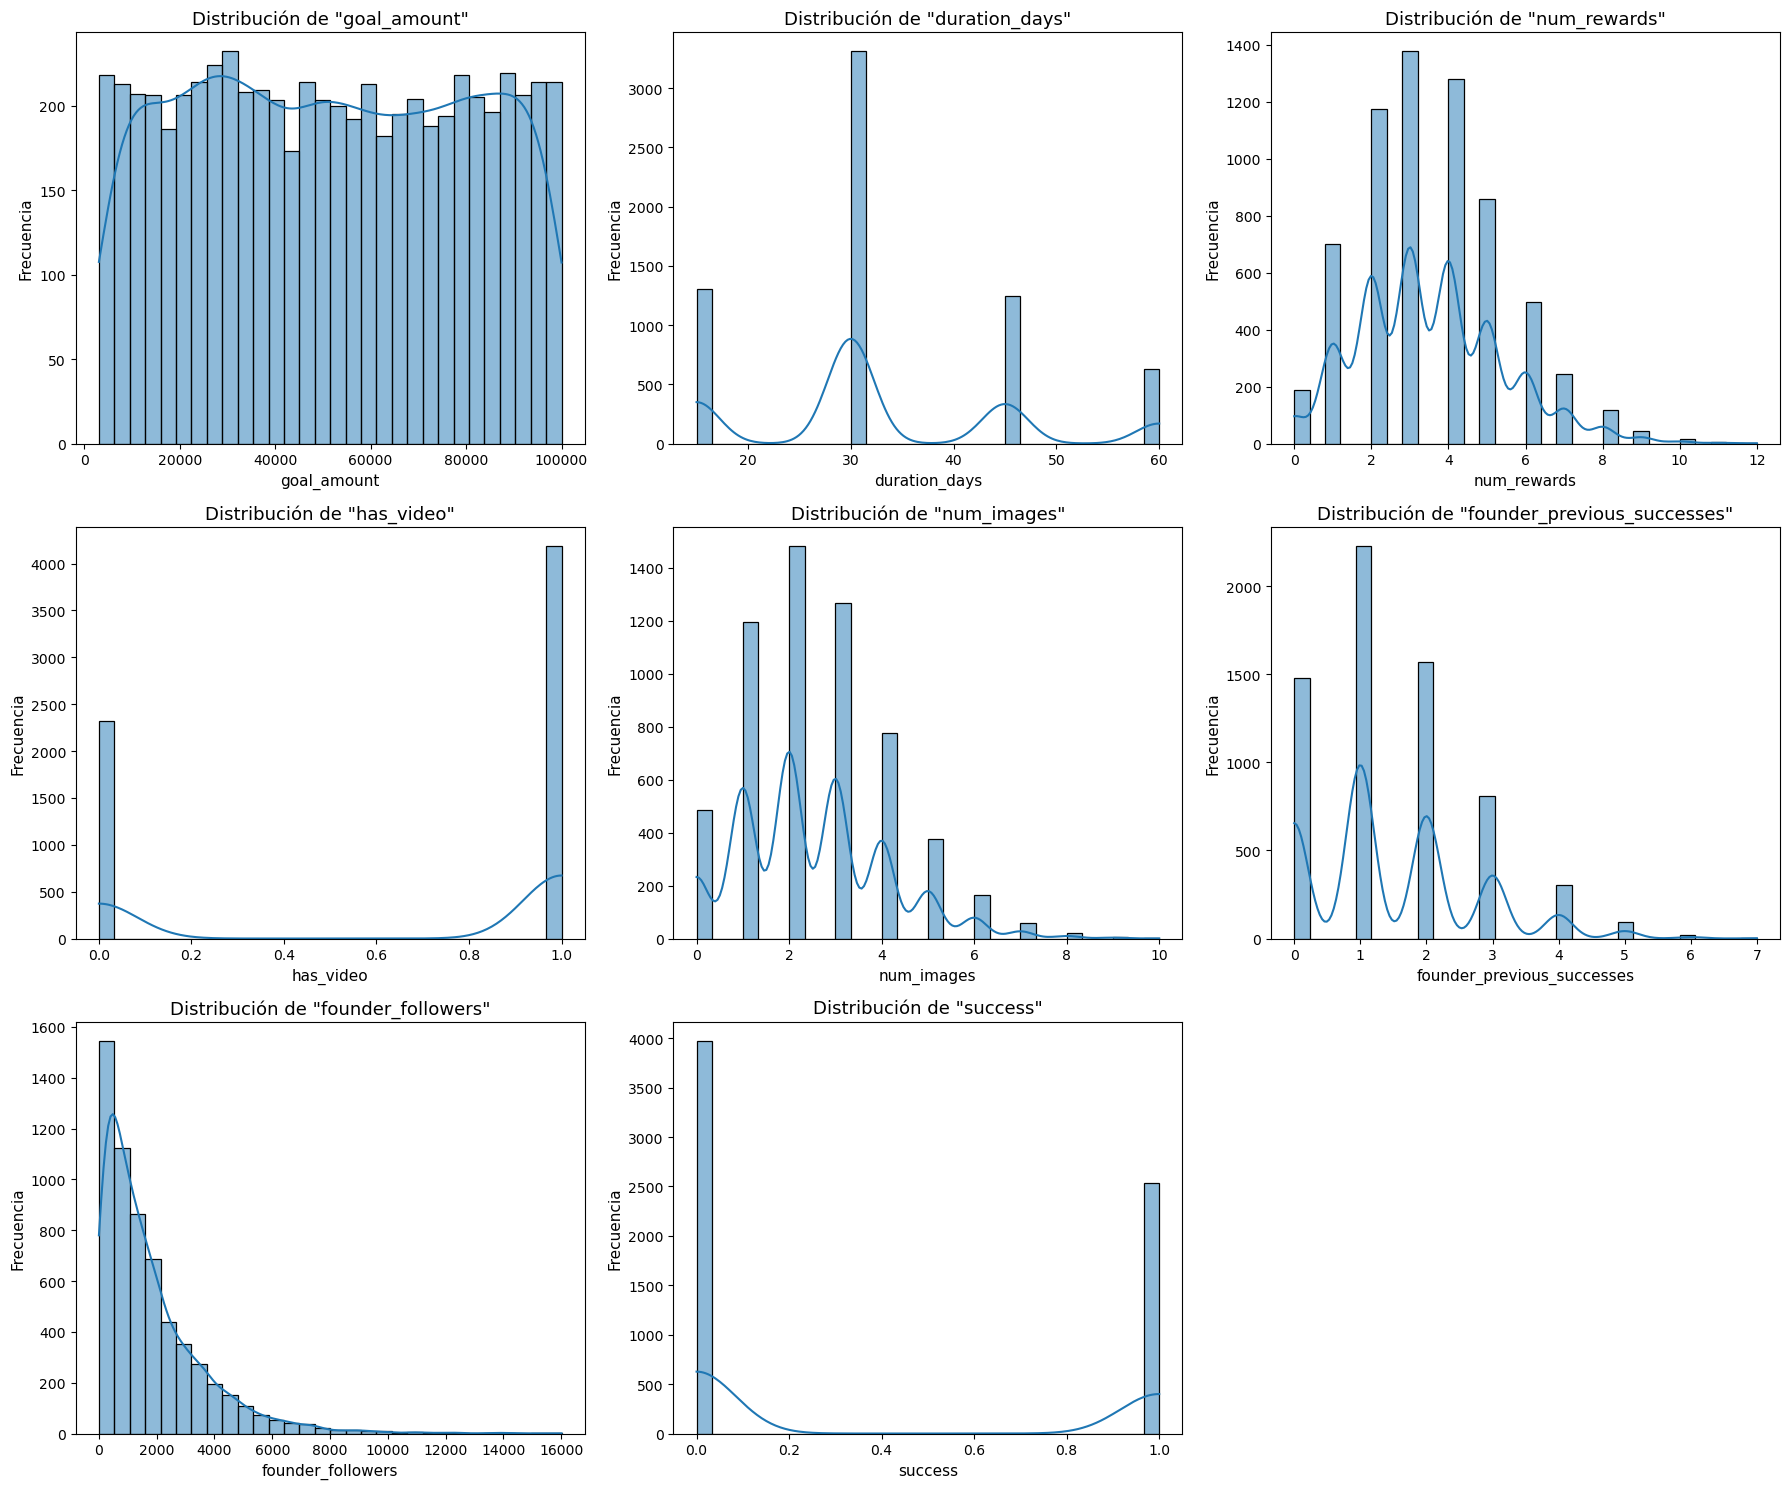

In [265]:
import math
numerical_vars = df_camp.select_dtypes(include=['int64', 'float64']).columns

# Cantidad de gr√°ficos y configuraci√≥n de grilla
num_vars = len(numerical_vars)
cols = 3
rows = math.ceil(num_vars / cols)

# Crear figura y ejes
fig, axes = plt.subplots(rows, cols, figsize=(18, 5 * rows))
axes = axes.flatten()  # Aplanar la grilla para recorrer f√°cilmente

# Generar cada histograma
for i, col in enumerate(numerical_vars):
    sns.histplot(df_camp[col], kde=True, bins=30, edgecolor='black', ax=axes[i])
    axes[i].set_title(f'Distribuci√≥n de "{col}"', fontsize=13)
    axes[i].set_xlabel(col, fontsize=11)
    axes[i].set_ylabel("Frecuencia", fontsize=11)

# Eliminar ejes vac√≠os si sobran
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## üìä Conclusiones sobre la distribuci√≥n de variables del dataset de campa√±as de crowdfunding

### üéØ `goal_amount` (Monto objetivo de recaudaci√≥n)
- Distribuci√≥n **aproximadamente uniforme**. Voy a tener que considerar aplicar escalado dentro de mi Pipeline para facilitar el aprendizaje del modelo.

### üìÜ `duration_days` (Duraci√≥n de la campa√±a)
- Distribuci√≥n con picos en duraciones comunes como **30 y 60 d√≠as**.

### üéÅ `num_rewards` (Cantidad de recompensas ofrecidas)
- Distribuci√≥n concentrada en valores bajos (entre 0 y 5).
- Pocos casos con m√°s de 10 recompensas, que podr√≠an representar campa√±as complejas o mal estructuradas.

### üé• `has_video` (¬øTiene video?)
- Variable binaria con distribuci√≥n **desbalanceada**: la mayor√≠a de las campa√±as **s√≠ incluyen un video**.
- Puede ser un fuerte predictor de √©xito.

### üñºÔ∏è `num_images` (Cantidad de im√°genes)
- Distribuci√≥n **asim√©trica**, con mayor frecuencia en campa√±as con entre 1 y 5 im√°genes.
- Campa√±as sin im√°genes o con muchas im√°genes son minor√≠a y podr√≠an ser casos extremos.

### üßë‚Äçüíº `founder_previous_successes` (√âxitos anteriores del fundador)
- Distribuci√≥n **muy sesgada**, donde la mayor√≠a tiene **0 o 1 √©xito previo**.
- Puede representar experiencia acumulada y ser un fuerte predictor.

### üë• `founder_followers` (Cantidad de seguidores del fundador)
- Distribuci√≥n **fuertemente sesgada**, con la mayor√≠a de los fundadores teniendo pocos seguidores.

### ‚úÖ `success` (Variable objetivo: ¬øFue exitosa la campa√±a?)
- Distribuci√≥n **desbalanceada**, con mayor√≠a de campa√±as exitosas (~60-70%).


### ‚Üí An√°lisis de sesgos por d√≠as.

In [266]:
dias = sorted(df_camp['duration_days'].unique())
print(dias)

[15, 30, 45, 60]


In [267]:
# Creo una funcion para clasificar la duraci√≥n de campa√±a
def clasificar_duracion(dias):
    if dias <= 20:
        return "corta"
    elif 21 <= dias <= 40:
        return "media"
    else:
        return "larga"

df_camp["tipo_duracion"] = df_camp["duration_days"].apply(clasificar_duracion)

In [268]:
exito_por_duracion = df_camp.groupby("tipo_duracion").agg({"success": "count"}).reset_index()
exito_por_duracion

tipo_duracion  success
0         corta     1309
1         larga     1880
2         media     3311

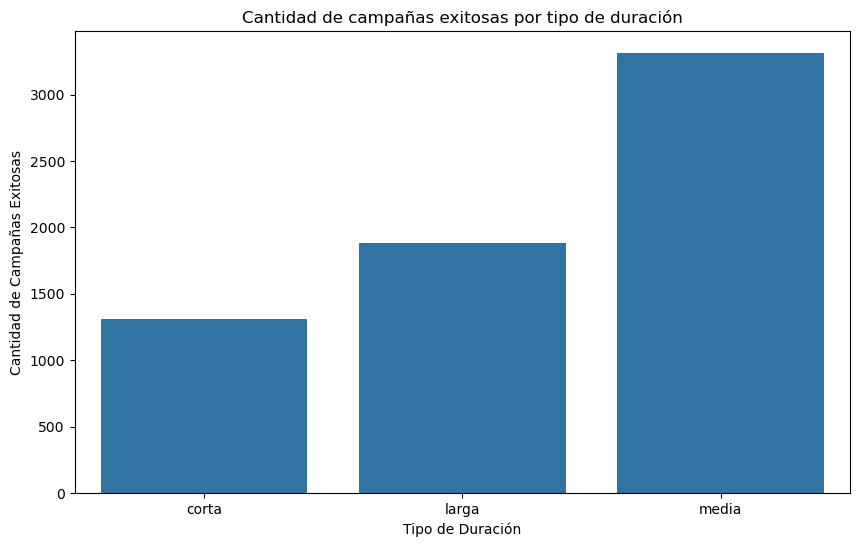

In [269]:
plt.figure(figsize=(10,6))
sns.barplot(data=exito_por_duracion, x="tipo_duracion", y="success")
plt.title("Cantidad de campa√±as exitosas por tipo de duraci√≥n")
plt.xlabel("Tipo de Duraci√≥n")
plt.ylabel("Cantidad de Campa√±as Exitosas")
plt.show()

El gr√°fico muestra la **cantidad total de campa√±as exitosas** agrupadas por tipo de duraci√≥n: **corta**, **media** y **larga**. A partir de esta visualizaci√≥n, se pueden destacar las siguientes conclusiones:
- üìà **Duraci√≥n Media** (21 a 40 d√≠as) es la categor√≠a con **mayor cantidad de campa√±as exitosas**, superando las 3.200. Esto sugiere que es la opci√≥n m√°s favorable para alcanzar el objetivo de recaudaci√≥n.

- üï∞Ô∏è **Duraci√≥n Larga** (> 40 d√≠as) presenta un volumen moderado de campa√±as exitosas, pero **significativamente menor** que la duraci√≥n media. Esto puede indicar p√©rdida de tracci√≥n o disminuci√≥n del inter√©s a lo largo del tiempo.

- ‚è±Ô∏è **Duraci√≥n Corta** (‚â§ 20 d√≠as) es la categor√≠a con **menor cantidad de campa√±as exitosas**. Esto refuerza la hip√≥tesis de que una duraci√≥n muy limitada **no permite alcanzar visibilidad suficiente ni completar el ciclo de recaudaci√≥n**.


### ‚Üí Variable target

In [270]:
si_success = df_camp[df_camp['success'] == 1]
no_success = df_camp[df_camp['success'] == 0]

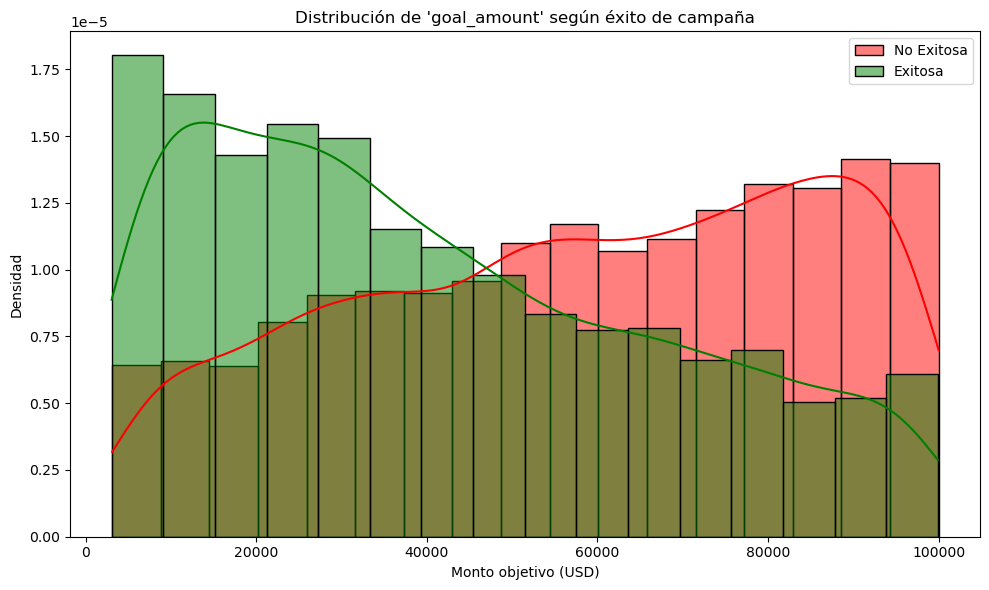

In [271]:
plt.figure(figsize=(10, 6))
sns.histplot(no_success["goal_amount"], label="No Exitosa", color="red", kde=True, stat="density")
sns.histplot(si_success["goal_amount"], label="Exitosa", color="green", kde=True, stat="density")

plt.title("Distribuci√≥n de 'goal_amount' seg√∫n √©xito de campa√±a")
plt.xlabel("Monto objetivo (USD)")
plt.ylabel("Densidad")
plt.legend()
plt.tight_layout()
plt.show()


## üéØ Distribuci√≥n del Monto Objetivo (`goal_amount`) seg√∫n √âxito de Campa√±a

La gr√°fica muestra la distribuci√≥n del **monto objetivo de recaudaci√≥n en USD**, diferenciando entre campa√±as que **no fueron exitosas** (rojo) y aquellas que **s√≠ lo fueron** (verde).

### üîç Conclusiones:

- Las **campa√±as exitosas** tienden a fijar montos **m√°s bajos** como objetivo, con una mayor densidad concentrada por debajo de los **40.000 USD**. Esto sugiere que establecer objetivos moderados puede llegar a aumentar la probabilidad de √©xito.

- Por el contrario, las **campa√±as no exitosas** son m√°s frecuentes a medida que el objetivo se incrementa, especialmente a partir de los **60.000 USD**. Esto indica que cuanto m√°s ambicioso es el monto, menor es la probabilidad de alcanzar el objetivo.


### `Distribuci√≥n general de la variable target`

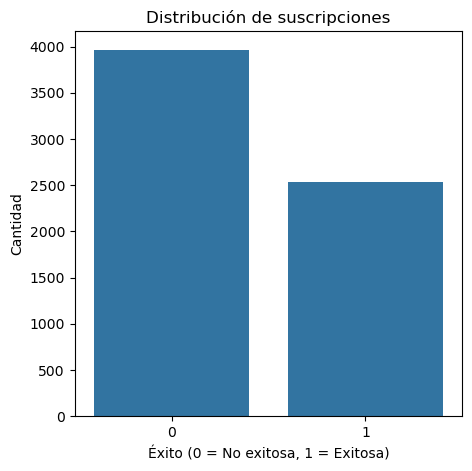

In [272]:
plt.figure(figsize=(5, 5))
sns.countplot(data=df_camp, x='success')
plt.title("Distribuci√≥n de suscripciones")
plt.xlabel("√âxito (0 = No exitosa, 1 = Exitosa)")
plt.ylabel("Cantidad")
plt.show()


### `An√°lisis por variables categ√≥ricas`

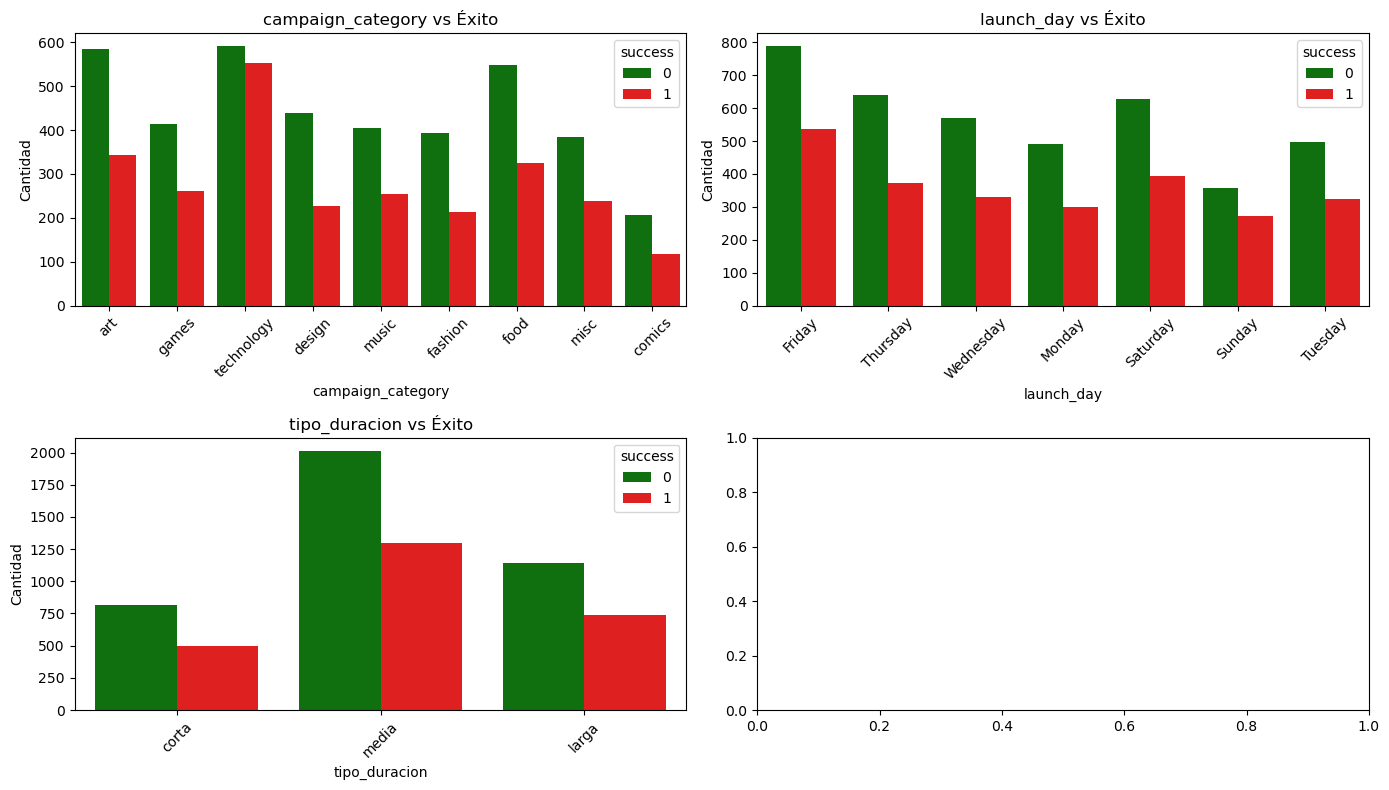

In [273]:
import math

categoricas = df_camp.select_dtypes(exclude=[np.number]).columns.tolist()

categoricas = categoricas

fig, axs = plt.subplots(math.ceil(len(categoricas)/2), 2, figsize=(14, 4 * math.ceil(len(categoricas)/2)))
axs = axs.flatten()

custom_palette = {1: 'Red', 0: 'Green'}

for i, col in enumerate(categoricas):
    sns.countplot(data=df_camp, x=col, hue='success', palette=custom_palette, ax=axs[i])
    axs[i].set_title(f'{col} vs √âxito')
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].set_ylabel("Cantidad")

plt.tight_layout()
plt.show()


## üìå Conclusi√≥n

Con base en el an√°lisis realizado, las **campa√±as que s√≠ fueron exitosas** tienden a compartir ciertas caracter√≠sticas que las distinguen de las **no exitosas**. 

| **Columna (Caracter√≠stica)**     | **Tendencia en campa√±as exitosas**                                           |
|----------------------------------|------------------------------------------------------------------------------|
| üé® `campaign_category`           | Mayor √©xito en categor√≠as como **art, technology y food**                   |
| üìÖ `launch_day`                  | Las campa√±as lanzadas un **viernes o s√°bado** tienen mayor tasa de √©xito    |
| ‚è≥ `tipo_duracion`               | Las campa√±as de **duraci√≥n media (21-40 d√≠as)** muestran mejor desempe√±o    |

Estas observaciones sugieren que la probabilidad de que una campa√±a alcance su objetivo de recaudaci√≥n est√° influenciada tanto por **cu√°ndo se lanza**, **cu√°nto dura**, como por la **categor√≠a tem√°tica**. Esta informaci√≥n es clave para:
- **Optimizar las recomendaciones de campa√±as en la homepage**, priorizando las de mayor probabilidad de √©xito.
- **Asesorar a emprendedores** sobre c√≥mo estructurar y calendarizar sus campa√±as para maximizar el rendimiento.


---

## **Parte 3: Preparaci√≥n de Datos para Modelado**


### ‚Üí Selecci√≥n de Caracter√≠sticas. Decido qu√© variables incluir en el modelo. Considero excluir variables con sesgos introducidos artificialmente para evaluar su impacto en el rendimiento del modelo.

In [274]:
df_camp.select_dtypes(include=['object']).columns

Index(['campaign_category', 'launch_day', 'tipo_duracion'], dtype='object')

In [275]:
df_camp = df_camp.drop(['tipo_duracion'], axis=1)

In [276]:
categoricas = ['campaign_category', 'launch_day']
df_camp = pd.get_dummies(df_camp, columns=categoricas)

In [277]:
df_camp = df_camp.replace({True: 1, False: 0})

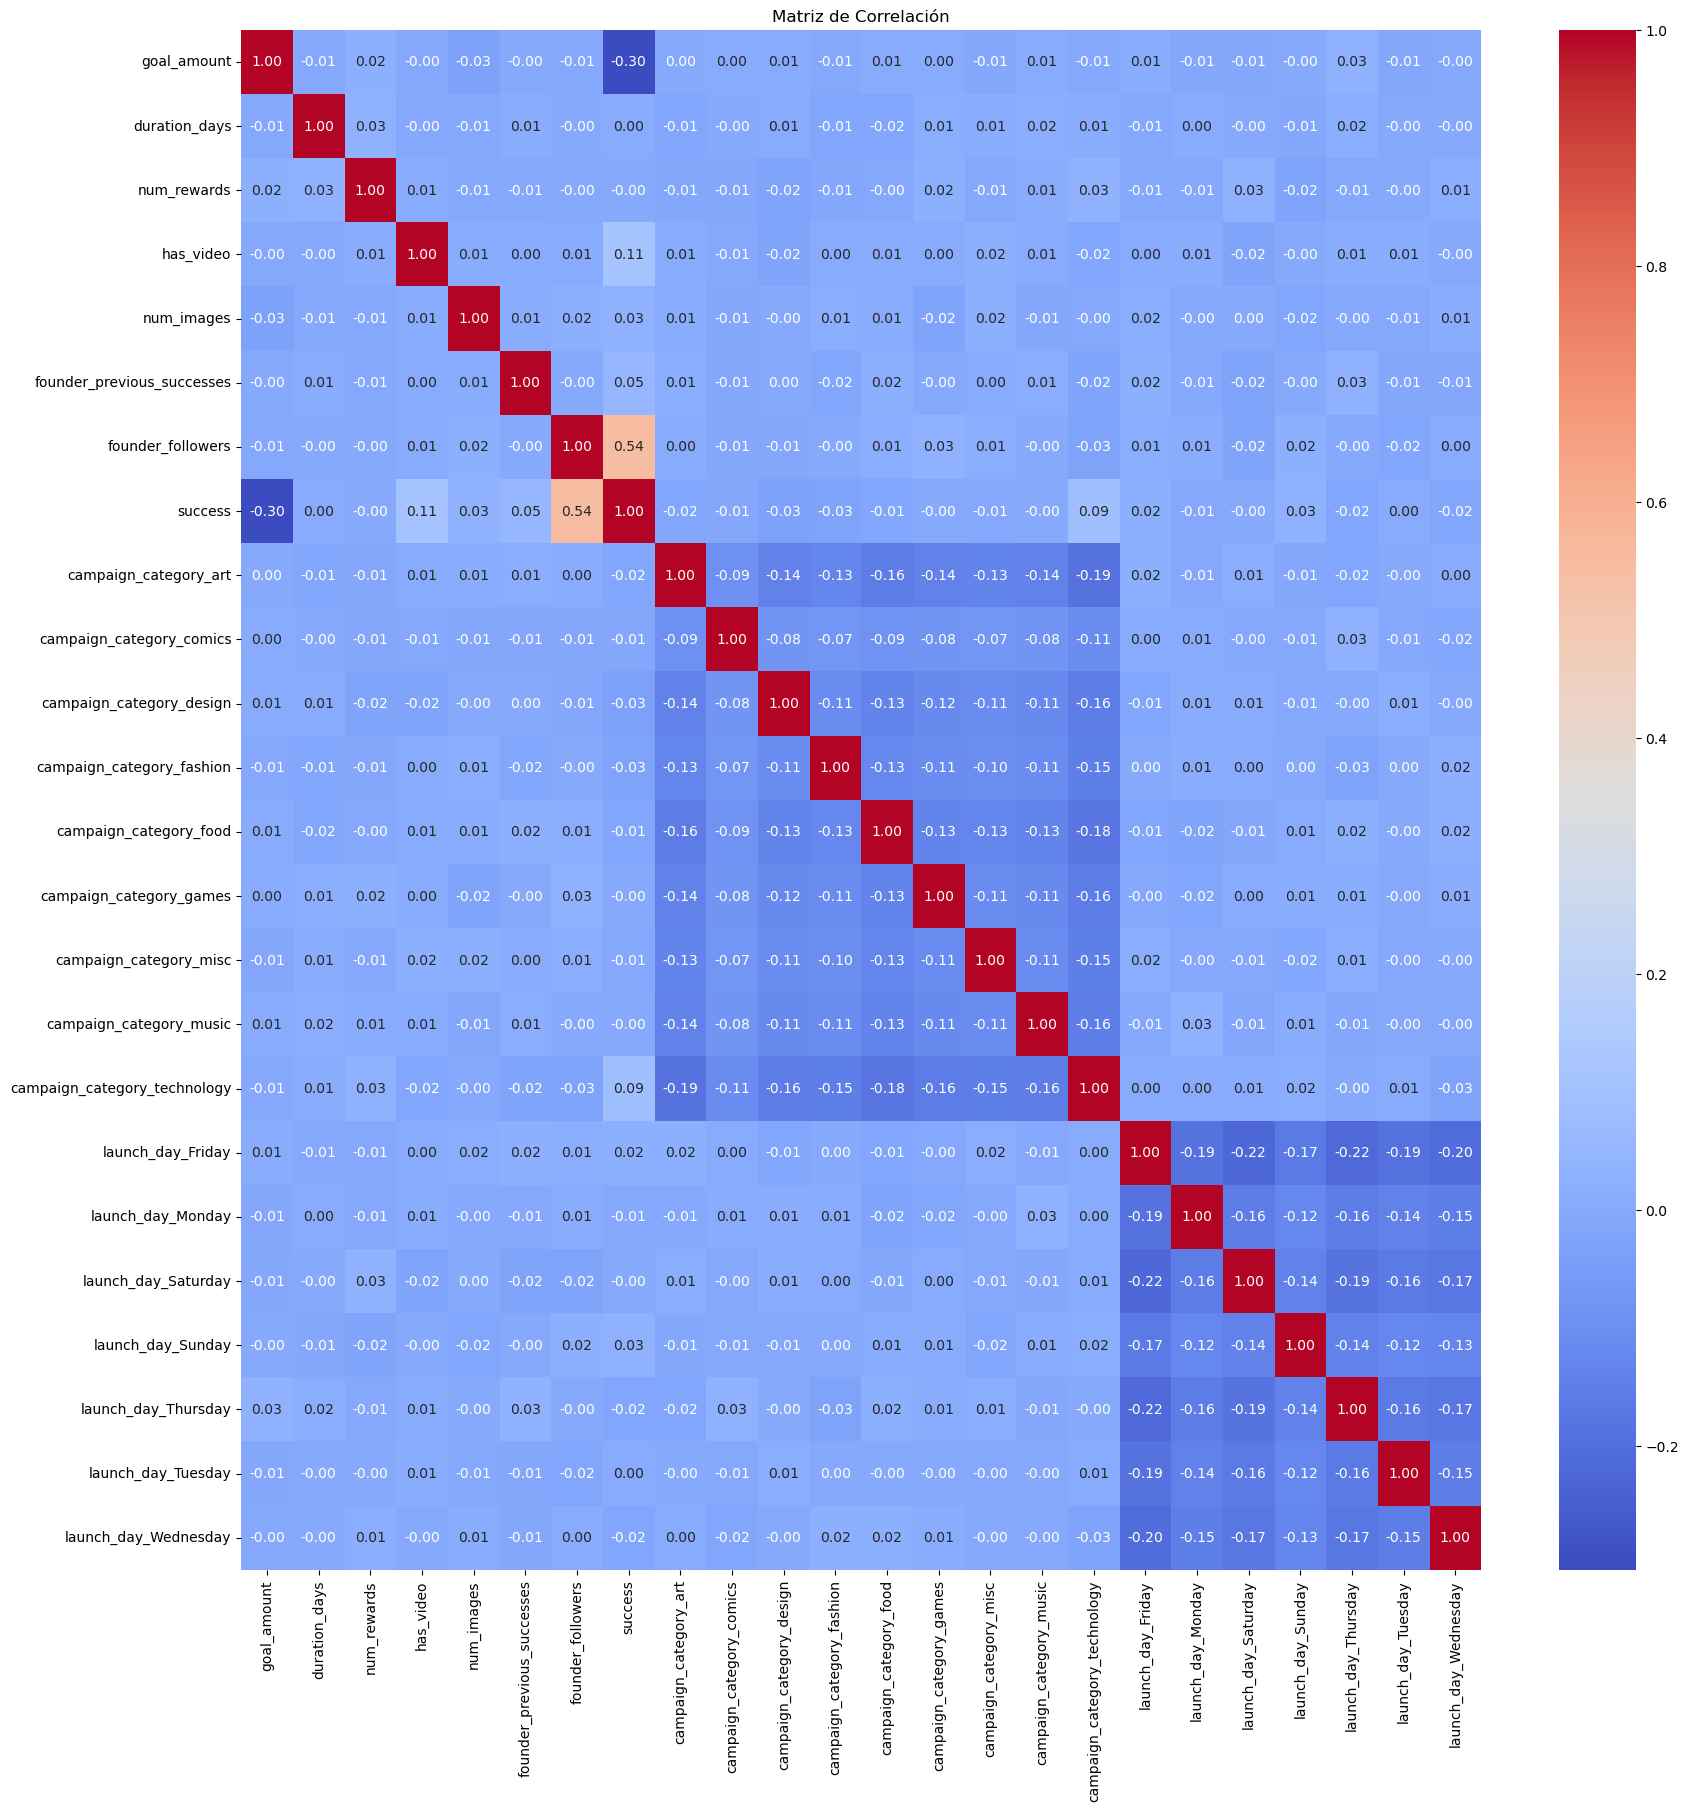

In [278]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_camp.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlaci√≥n")
plt.show()

In [279]:
df_camp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   goal_amount                   6156 non-null   float64
 1   duration_days                 6500 non-null   int64  
 2   num_rewards                   6500 non-null   int64  
 3   has_video                     6500 non-null   int64  
 4   num_images                    5831 non-null   float64
 5   founder_previous_successes    6500 non-null   int64  
 6   founder_followers             6028 non-null   float64
 7   success                       6500 non-null   int64  
 8   campaign_category_art         6500 non-null   int64  
 9   campaign_category_comics      6500 non-null   int64  
 10  campaign_category_design      6500 non-null   int64  
 11  campaign_category_fashion     6500 non-null   int64  
 12  campaign_category_food        6500 non-null   int64  
 13  cam

---

## **Parte 4: Modelado**


In [280]:
# Separo mi df en X e Y
X = df_camp.drop(['success'], axis=1)
y = df_camp['success']

# Separo en train y test con 0.2 en test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify = y
)

##### ¬øEst√° balanceado mi dataset?

In [281]:
# Contar la cantidad de valores de cada clase
counts = y.value_counts()

# Calcular la proporci√≥n de cada clase
prop = counts / counts.sum()

# Imprimir los resultados
print("N√∫mero de muestras por clase:\n", counts)
print("\nProporci√≥n de muestras por clase:\n", prop)


N√∫mero de muestras por clase:
 success
0    3968
1    2532
Name: count, dtype: int64

Proporci√≥n de muestras por clase:
 success
0    0.610462
1    0.389538
Name: count, dtype: float64


##### S√≠. Claramente este dataset esta desbalanceado (levemente), por lo tanto vamos a necesitar usar un metodo de balanceo de clases.

In [282]:
from sklearn.exceptions import FitFailedWarning
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FitFailedWarning)

In [283]:
# Funciones que utilizar√© al trabajar con mi modelo
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import scipy.stats as st

from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm
from lightgbm import LGBMClassifier

from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold, train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import roc_auc_score, f1_score, roc_curve, auc, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.pipeline import Pipeline, make_pipeline

In [ ]:
def model_trial(model, parameters):
    np.random.seed(42)

    # Definimos los 5 splits (cv) para mantener la proporci√≥n de clases
    kf = StratifiedKFold(n_splits=5, shuffle=False)

    # Definimos el pipeline
    pipe = Pipeline(steps=[
        ('sampler', 'passthrough'),  # Balanceo de clases
        ('imputer', SimpleImputer(strategy='median')),  # Imputaci√≥n de valores faltantes
        ('scaler', StandardScaler()),  # Escalado de variables numericas
        ('selector', SelectKBest(f_classif)),  # Selecci√≥n de k caracter√≠sticas mejores
        ('classifier', model)  # Modelo
    ])


    # Hiperpar√°metros + opciones de balanceo
    full_param_grid = {
        'sampler': ['passthrough', SMOTE(), RandomOverSampler(), SMOTEENN(), SMOTETomek()], # estrategias de balanceo de clases
        'selector__k': [5, 10, 15, 20],
        **parameters # parametros propios de clasificador
    }

    # RandomizedSearchCV con scoring basado en precision (quiero optimizar esa m√©trica) ya que el error por exceso es grave.
    grid = RandomizedSearchCV(pipe, full_param_grid, cv=kf, scoring='precision')
    grid.fit(X_train, y_train)

    # Obtenemos el mejor modelo
    best_params = grid.best_params_ # mejor combinaci√≥n de hiperpar√°metros encontrada
    best_model = grid.best_estimator_ # pipeline completo (incluyendo modelo y preprocesamiento) con mejor rendimiento
    best_score = grid.best_score_ # mejor valor de la m√©trica usada en CV (en este caso, precision)

    # M√©tricas de entrenamiento
    y_train_pred = best_model.predict(X_train)
    auc_roc_train = roc_auc_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred)

    # M√©tricas de test
    y_pred = best_model.predict(X_test)
    auc_roc = roc_auc_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    # Prints
    print(f"Mejores par√°metros: {best_params}")
    print(f"AUC-ROC Train: {auc_roc_train} and AUC-ROC Test: {auc_roc}")
    print(f"F1-Score Train: {f1_train} and F1-Score Test: {f1}")
    print(f"Precision Train: {precision_train} and Precision Test: {precision}")
    print(f"Recall-Score Train: {recall_train} and Recall-Score Test: {recall}")
    ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)

    return recall, auc_roc, f1, precision, best_model, recall_train, auc_roc_train, f1_train, precision_train, best_params


---

## **Logistic Regresion**

Mejores par√°metros: {'selector__k': 25, 'sampler': 'passthrough', 'classifier__class_weight': 'balanced', 'classifier__C': 0.01}
AUC-ROC Train: 0.7998816270649172 and AUC-ROC Test: 0.7942399020320388
F1-Score Train: 0.7561683599419449 and F1-Score Test: 0.7497621313035204
Precision Train: 0.74146110056926 and Precision Test: 0.7229357798165138
Recall-Score Train: 0.7714708785784797 and Recall-Score Test: 0.7786561264822134


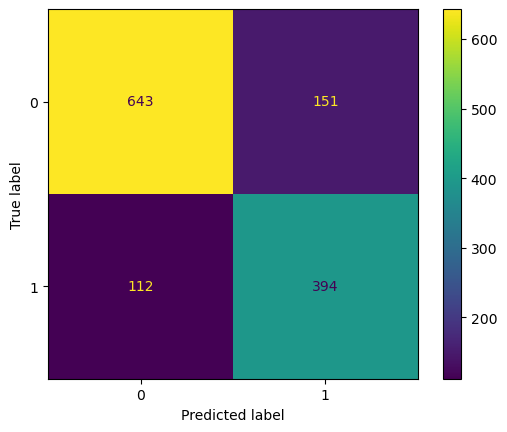

In [285]:
model_lr = LogisticRegression(penalty='l2', random_state=42)

parameters_lr = {
    'classifier__C': [0.001, 0.01, 0.1, 1],  # inverso de la regularizaci√≥n L2 (menor C = m√°s regularizaci√≥n)
    'classifier__class_weight': [None, 'balanced']  # ajusta el peso de las clases para tratar desbalance
}

lr = model_trial(model_lr, parameters_lr)


---

## **Random Forest**

Mejores par√°metros: {'selector__k': 30, 'sampler': 'passthrough', 'classifier__n_estimators': 150, 'classifier__max_leaf_nodes': 8, 'classifier__max_depth': 7, 'classifier__class_weight': None}
AUC-ROC Train: 0.7409943575360266 and AUC-ROC Test: 0.7304785894206549
F1-Score Train: 0.6578782172002511 and F1-Score Test: 0.640506329113924
Precision Train: 0.903448275862069 and Precision Test: 0.8908450704225352
Recall-Score Train: 0.5172754195459033 and Recall-Score Test: 0.5


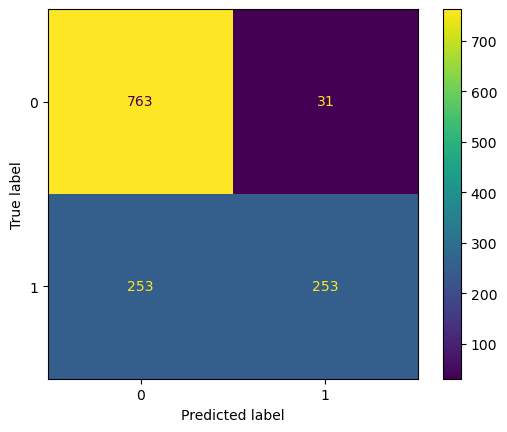

In [286]:
model_rf = RandomForestClassifier(random_state=42)

parameters_rf = {
    'classifier__n_estimators': [100, 150, 200, 250, 300],  # cantidad de √°rboles
    'classifier__max_depth': [3, 4, 5, 6, 7, 8],  # profundidad m√°xima de cada √°rbol (m√°s profundo = m√°s complejo)
    'classifier__max_leaf_nodes': [4, 6, 8, 10, 12, 14, 16, 18, 20],  # m√°ximo n√∫mero de nodos internos (controla el tama√±o del √°rbol)
    'classifier__class_weight': [None, 'balanced']  # ajusta el peso de las clases para manejar desbalance
}

rf = model_trial(model_rf, parameters_rf)


---

## **XGBoost**


Mejores par√°metros: {'selector__k': 30, 'sampler': 'passthrough', 'classifier__subsample': 0.6, 'classifier__scale_pos_weight': 2, 'classifier__reg_lambda': 2, 'classifier__reg_alpha': 0.5, 'classifier__n_estimators': 200, 'classifier__min_child_weight': 5, 'classifier__max_depth': 6, 'classifier__learning_rate': 0.05, 'classifier__colsample_bytree': 0.7}
AUC-ROC Train: 0.8616898094152202 and AUC-ROC Test: 0.7853939128443563
F1-Score Train: 0.8271464358915964 and F1-Score Test: 0.741733690795353
Precision Train: 0.7678646934460888 and Precision Test: 0.6769983686786297
Recall-Score Train: 0.8963474827245804 and Recall-Score Test: 0.8201581027667985


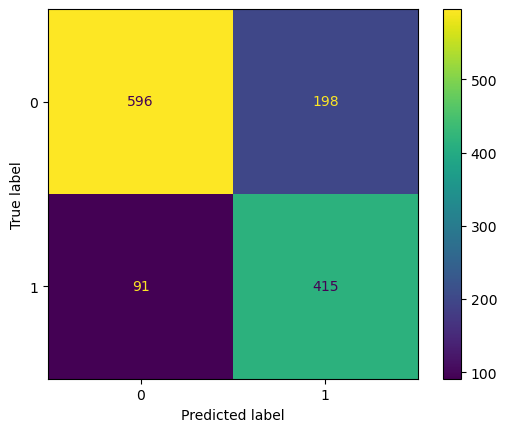

In [287]:
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

parameters_xgb = {
    'classifier__n_estimators': [100, 150, 200, 250, 300],  # divisiones del modelo XGB
    'classifier__learning_rate': [0.01, 0.05, 0.1],  # m√≠nimo information gain por divisi√≥n
    'classifier__max_depth': [3, 4, 5, 6, 7],  # reducir la profundidad
    'classifier__min_child_weight': [4, 5, 6, 7],  # mayor peso = menos divisi√≥n
    'classifier__subsample': [0.6, 0.7, 0.8],  # igual, introduce aleatoriedad
    'classifier__colsample_bytree': [0.6, 0.7, 0.8],  # tambi√©n baja un poco la complejidad
    'classifier__reg_alpha': [0.1, 0.5, 1],  # regularizaci√≥n L1
    'classifier__reg_lambda': [1, 2, 3],  # regularizaci√≥n L2
    'classifier__scale_pos_weight': [1, 1.5, 2]  # balanceo de clases para regresi√≥n log√≠stica
}

xgb = model_trial(model_xgb, parameters_xgb)

---

## **LightGBM**


[LightGBM] [Info] Number of positive: 1620, number of negative: 2540
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000620 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 548
[LightGBM] [Info] Number of data points in the train set: 4160, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.389423 -> initscore=-0.449738
[LightGBM] [Info] Start training from score -0.449738
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

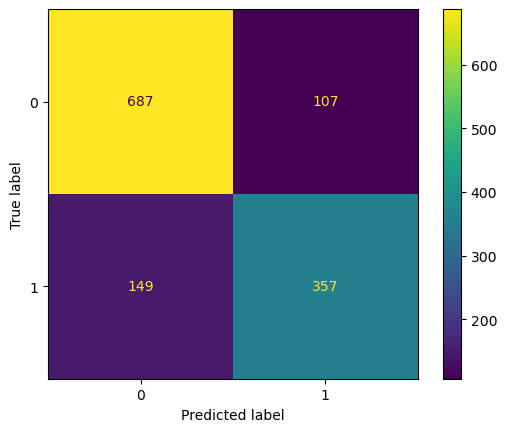

In [288]:
model_lgbm = LGBMClassifier(random_state=42)

parameters_lgbm = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [2, 3, 4, 5, 6],  # menos profundidad para evitar √°rboles muy especializados
    'classifier__learning_rate': [0.01, 0.05],  # m√°s bajo = menos riesgo de overfit, pero m√°s lento
    'classifier__num_leaves': [15, 31, 50],  # menos hojas = √°rboles menos complejos
    'classifier__min_child_samples': [20, 40, 60],  # aumentar m√≠nimo para evitar divisiones por ruido
    'classifier__subsample': [0.6, 0.7, 0.8],  # igual, introduce aleatoriedad
    'classifier__colsample_bytree': [0.6, 0.7],  # tambi√©n baja un poco la complejidad
    'classifier__scale_pos_weight': [1, 2, 3, 5],  # prob√° esto para clases desbalanceadas
    'classifier__reg_alpha': [0.0, 0.1, 0.5],  # regularizaci√≥n L1
    'classifier__reg_lambda': [0.0, 0.1, 0.5, 1.0]  # regularizaci√≥n L2
}

lgbm = model_trial(model_lgbm, parameters_lgbm)

---

## **Cat Boosting**


Mejores par√°metros: {'selector__k': 30, 'sampler': RandomOverSampler(), 'classifier__scale_pos_weight': 1, 'classifier__learning_rate': 0.05, 'classifier__l2_leaf_reg': 5, 'classifier__iterations': 100, 'classifier__depth': 4}
AUC-ROC Train: 0.8051219465163337 and AUC-ROC Test: 0.7981924712019992
F1-Score Train: 0.7626552053486151 and F1-Score Test: 0.7545023696682465
Precision Train: 0.7386679000925069 and Precision Test: 0.7249544626593807
Recall-Score Train: 0.7882527147087858 and Recall-Score Test: 0.7865612648221344


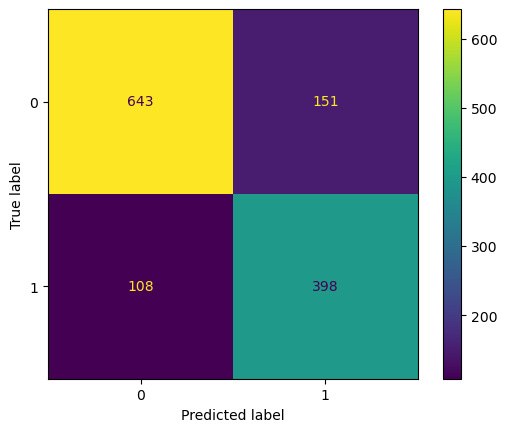

In [289]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(verbose=0, random_state=42)

parameters = {
    'classifier__iterations': [100, 200, 300, 400, 500],  # n√∫mero total de √°rboles (iteraciones del boosting)
    'classifier__depth': [3, 4, 5, 6, 7],  # profundidad m√°xima de cada √°rbol
    'classifier__learning_rate': [0.01, 0.05, 0.1],  # tasa de aprendizaje (m√°s baja = entrenamiento m√°s lento pero estable)
    'classifier__l2_leaf_reg': [3, 5, 7],  # regularizaci√≥n L2 para evitar overfitting
    'classifier__scale_pos_weight': [1, 5, 10]  # peso aplicado a la clase positiva para tratar desbalance
}

cb = model_trial(model, parameters)


---

In [290]:
def crear_tabla_resultados(lr, rf, xgb, lgbm, cb, scoring='precision'):

    df_funciones = pd.DataFrame()
    df_funciones["metodo"] = ["Regresi√≥n Log√≠stica", "Random Forest", "XGB", "LGBM", "CatBoost"]

    df_funciones["best_model"] = [lr[4], rf[4], xgb[4], lgbm[4], cb[4]]
    df_funciones["best_params"] = [lr[9], rf[9], xgb[9], lgbm[9], cb[9]]

    df_funciones["precision_train"] = [lr[8], rf[8], xgb[8], lgbm[8], cb[8]]
    df_funciones["precision"] = [lr[3], rf[3], xgb[3], lgbm[3], cb[3]]

    df_funciones["recall_train"] = [lr[5], rf[5], xgb[5], lgbm[5], cb[5]]
    df_funciones["recall"] = [lr[0], rf[0], xgb[0], lgbm[0], cb[0]]

    df_funciones["f1_train"] = [lr[7], rf[7], xgb[7], lgbm[7], cb[7]]
    df_funciones["f1"] = [lr[2], rf[2], xgb[2], lgbm[2], cb[2]]

    df_funciones["auc_roc_train"] = [lr[6], rf[6], xgb[6], lgbm[6], cb[6]]
    df_funciones["auc_roc"] = [lr[1], rf[1], xgb[1], lgbm[1], cb[1]]

    df_funciones = df_funciones.sort_values(by=scoring, ascending=False)

    return df_funciones

In [291]:
tabla = crear_tabla_resultados(lr, rf, xgb, lgbm, cb, scoring='precision')
display(tabla)

metodo                                         best_model  \
1        Random Forest  (passthrough, SimpleImputer(strategy='median')...   
3                 LGBM  (passthrough, SimpleImputer(strategy='median')...   
4             CatBoost  (RandomOverSampler(), SimpleImputer(strategy='...   
0  Regresi√≥n Log√≠stica  (passthrough, SimpleImputer(strategy='median')...   
2                  XGB  (passthrough, SimpleImputer(strategy='median')...   

                                         best_params  precision_train  \
1  {'selector__k': 30, 'sampler': 'passthrough', ...         0.903448   
3  {'selector__k': 35, 'sampler': 'passthrough', ...         0.861322   
4  {'selector__k': 30, 'sampler': RandomOverSampl...         0.738668   
0  {'selector__k': 25, 'sampler': 'passthrough', ...         0.741461   
2  {'selector__k': 30, 'sampler': 'passthrough', ...         0.767865   

   precision  recall_train    recall  f1_train        f1  auc_roc_train  \
1   0.890845      0.517275  0.500000  0.657878  0.640506       0.740994   
3   0.769397      0.784798  0.705534  0.821281  0.736082       0.852071   
4   0.724954      0.788253  0.786561  0.762655  0.754502       0.805122   
0   0.722936      0.771471  0.778656  0.756168  0.749762       0.799882   
2   0.676998      0.896347  0.820158  0.827146  0.741734       0.861690   

    auc_roc  
1  0.730479  
3  0.785386  
4  0.798192  
0  0.794240  
2  0.785394

In [292]:
def plot_roc_curves(lr, rf, xgb, lgbm, cb, X_test, y_test):

    modelos = {
        "Logistic Regression": lr[4],
        "Random Forest": rf[4],
        "XGBoost": xgb[4],
        "LightGBM": lgbm[4],
        "CatBoost": cb[4]
    }

    plt.figure(figsize=(9, 6))

    for nombre, modelo in modelos.items():
        # Probabilidades de clase positiva
        y_proba = modelo.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, label=f"{nombre} (AUC = {roc_auc:.2f})")

    # L√≠nea de referencia (modelo aleatorio)
    plt.plot([0, 1], [0, 1], 'k--', lw=1)

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curvas ROC comparativas')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

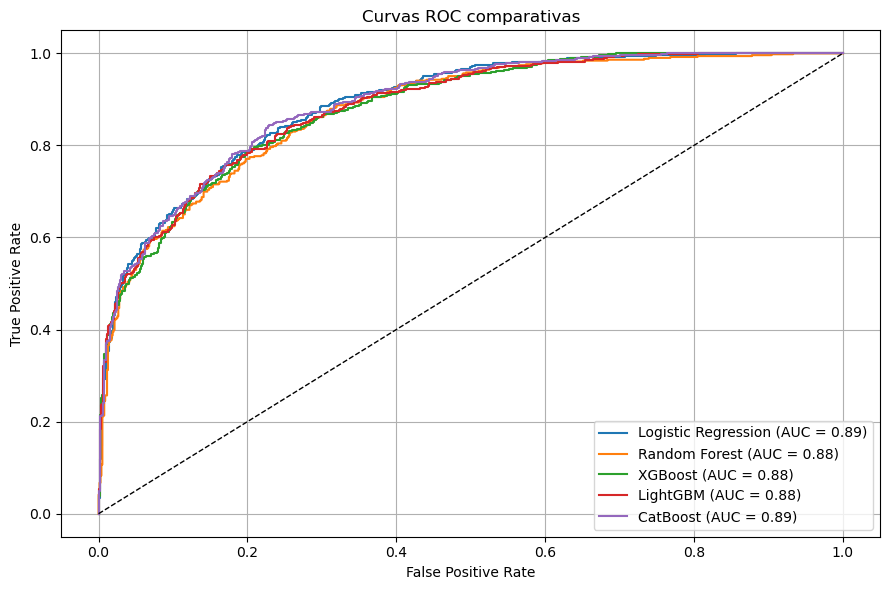

In [293]:
plot_roc_curves(lr, rf, xgb, lgbm, cb, X_test, y_test)

## üìä Conclusiones del Desempe√±o de Modelos de Clasificaci√≥n (en base a Precisi√≥n)

Dado que el objetivo es **mostrar campa√±as exitosas en el homepage y evitar destacar campa√±as que fracasen**, la m√©trica m√°s relevante es la **precisi√≥n**: de las campa√±as que el modelo predice como exitosas, ¬øcu√°ntas realmente lo son?

| Modelo                 | Precision | Recall | F1-score | AUC-ROC |
|------------------------|-----------|--------|----------|---------|
| **Random Forest**      | **0.8908** | 0.5000 | 0.6405   | 0.7305  |
| **LightGBM**           | 0.7694    | 0.7055 | 0.7361   | 0.7854  |
| **CatBoost**           | 0.7250    | 0.7866 | 0.7545   | 0.7982  |
| **Regresi√≥n Log√≠stica**| 0.7229    | 0.7787 | 0.7498   | 0.7942  |
| **XGBoost**            | 0.6770    | **0.8202** | 0.7417 | 0.7854  |

---

### ‚úÖ Observaciones clave

- **Random Forest** obtiene la **mayor precisi√≥n (0.89)**, lo que significa que, cuando predice que una campa√±a ser√° exitosa, **acierta con alt√≠sima probabilidad**. Este comportamiento es ideal para el objetivo planteado: **evitar mostrar campa√±as que luego fracasen**.

- A pesar de que **XGBoost** tiene el mejor **recall (0.82)**, su precisi√≥n es considerablemente menor, lo cual **no se alinea con el objetivo de negocio**, ya que podr√≠a destacar campa√±as fallidas.

- **LightGBM**, **CatBoost** y **Regresi√≥n Log√≠stica** ofrecen un buen equilibrio entre precisi√≥n y recall, pero est√°n por debajo del rendimiento de Random Forest en la m√©trica clave.

---

### üß† Conclusi√≥n final

Dado el objetivo del negocio ‚Äî**maximizar la tasa de campa√±as exitosas en el homepage y evitar destacar campa√±as fallidas**‚Äî, el modelo **Random Forest** es la opci√≥n m√°s adecuada:

- ‚úÖ **Alta precisi√≥n (0.89)** ‚Üí minimiza el riesgo de mostrar campa√±as no exitosas.
- ‚ö†Ô∏è Su `recall` es bajo, por lo que puede omitir algunas campa√±as buenas, pero eso est√° **alineado con el criterio estrat√©gico del negocio**.

> En este escenario, es preferible **no mostrar campa√±as dudosas** aunque implique perder algunas buenas, antes que **destacar campa√±as que probablemente fracasen**.
